# Mo hinh mua:

Mo hinh mua dac trung theo model MA.

AR

ARMA

ARIMA

In [3]:
library(TSA);
data(co2)
co2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,363.05,364.18,364.87,364.47,364.32,362.13,356.72,350.88,350.69,356.06,360.09,363.27
1995,363.49,364.94,366.72,366.33,365.75,364.32,358.59,352.06,353.45,357.27,362.34,365.65
1996,366.93,366.71,367.63,368.15,369.14,367.33,361.53,356.11,354.51,360.12,363.85,365.52
1997,367.72,369.08,368.17,368.83,369.49,367.57,360.79,355.16,356.01,360.71,364.77,367.81
1998,369.40,370.12,370.88,370.53,371.56,369.28,364.50,357.46,360.54,364.04,368.74,371.58
1999,372.60,373.85,373.75,374.10,374.50,372.04,364.81,359.11,359.65,364.94,369.82,372.62
2000,373.23,375.13,374.83,375.42,376.18,374.01,366.54,360.78,361.77,367.51,370.58,373.37
2001,375.49,375.94,376.42,377.48,377.67,374.78,367.38,361.67,363.39,367.74,373.18,374.41
2002,376.68,377.42,378.27,378.73,379.01,375.95,370.78,364.07,365.36,370.25,374.04,377.99
2003,379.03,379.36,380.90,381.39,382.38,381.02,373.78,367.97,368.55,372.28,377.75,379.99


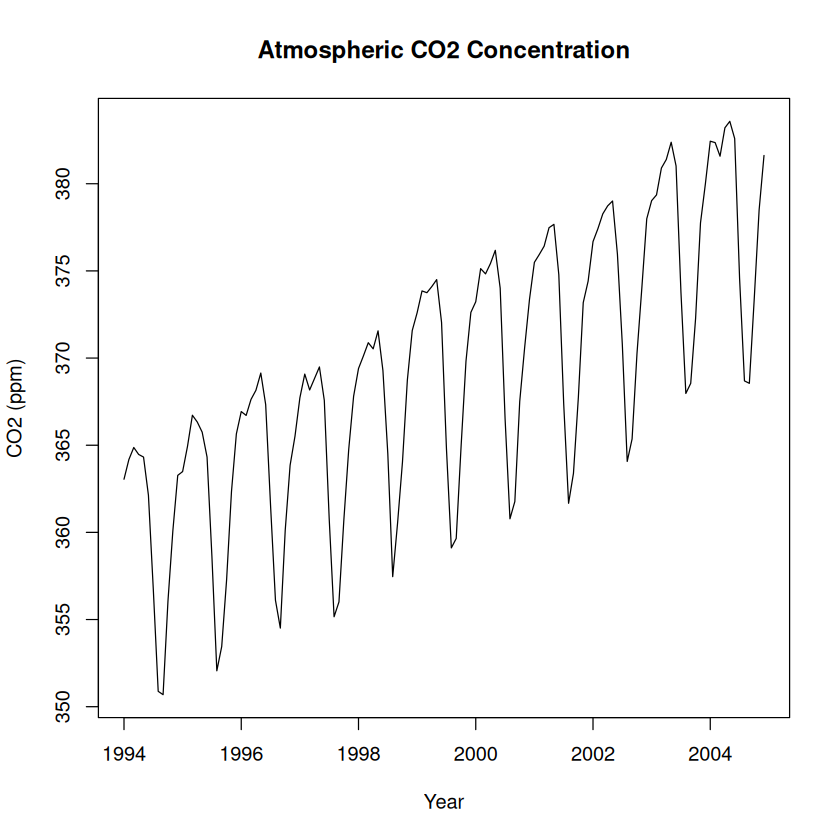

In [4]:
plot(co2, main="Atmospheric CO2 Concentration", ylab="CO2 (ppm)", xlab="Year")

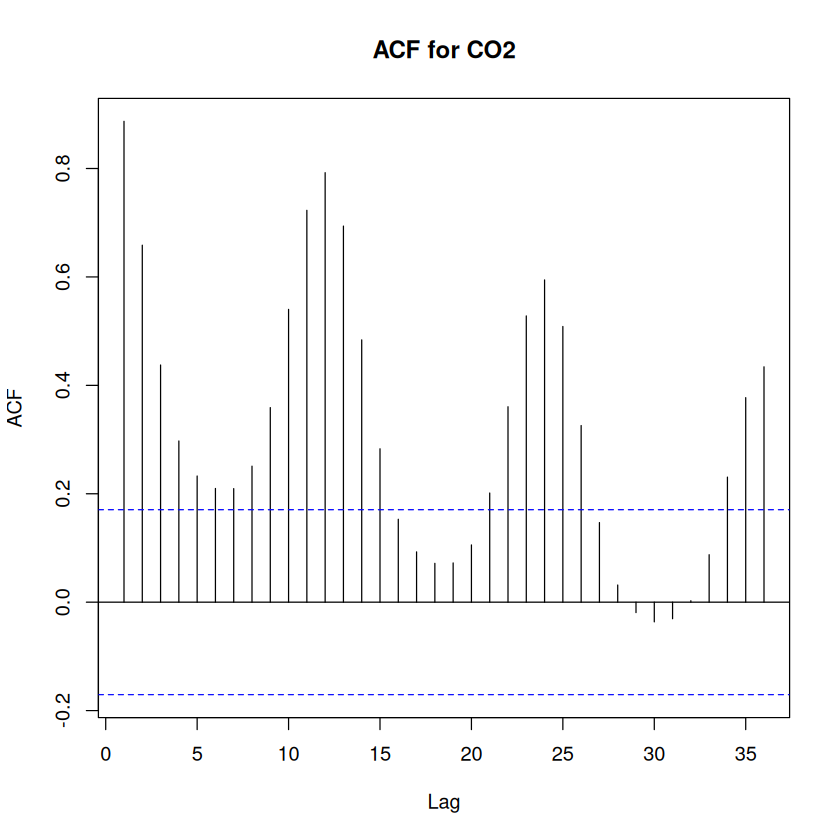

In [7]:
acf(as.vector(co2), lag.max = 36, main="ACF for CO2")
# Chu ky lap lai sau khoang 12 do tre

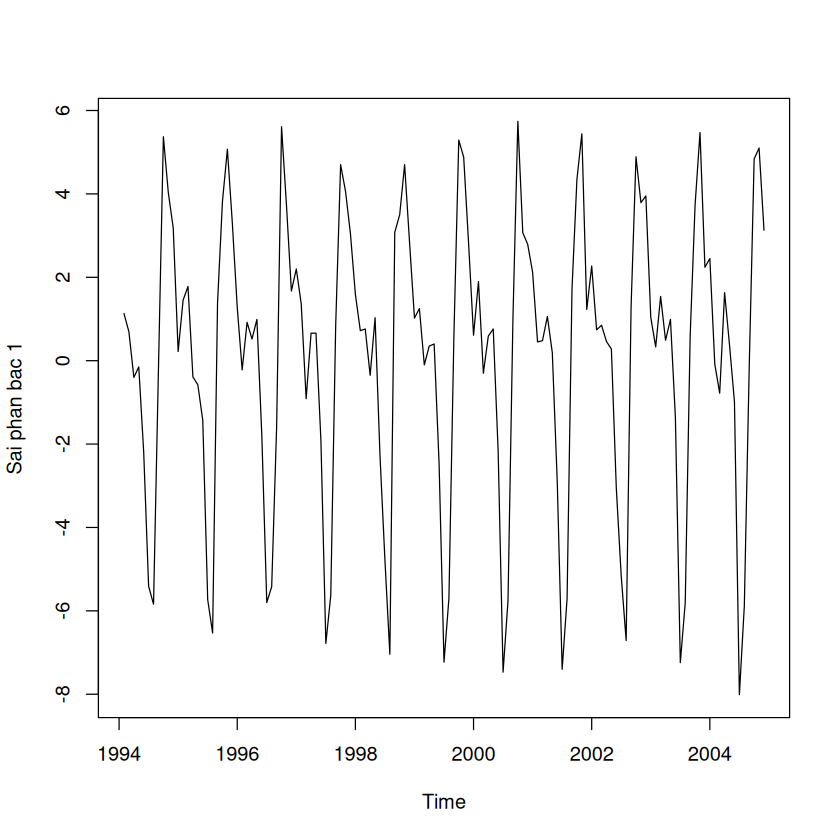

In [8]:
plot(diff(co2), ylab = 'Sai phan bac 1')

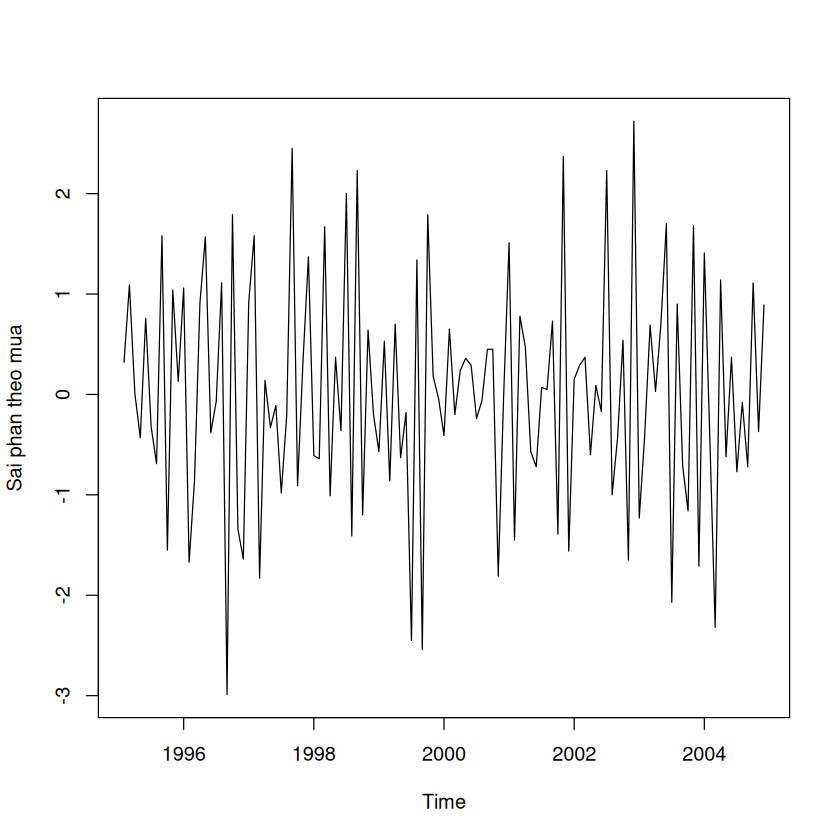

In [10]:
plot(diff(diff(co2), lag=12), ylab = 'Sai phan theo mua')
# Do tre 12 la chu ky theo mua
# Tinh tang bien mat, tinh mua bien mat

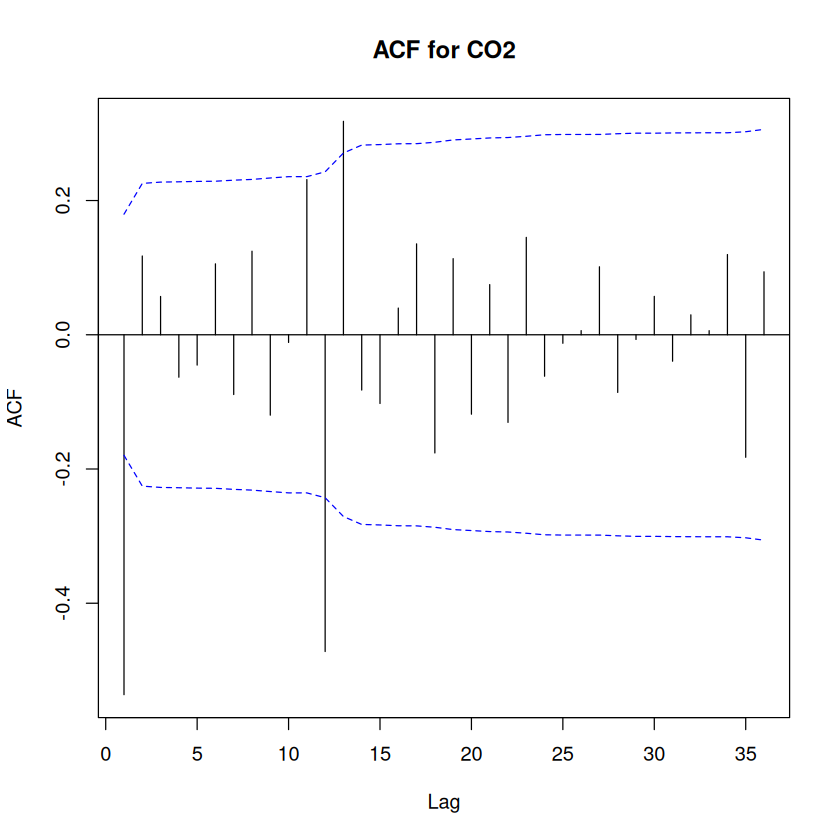

In [13]:
acf(as.vector(diff(diff(co2), lag=12)), lag.max = 36, main="ACF for CO2", ci.type = "ma")
# Ket luan mo hinh goc la mo hinh mua voi lag=12, chuoi cua mo hinh la ARIMA(0, 1, 1) X (0, 1, 1)_{12}

initial  value 0.141777 
iter   2 value -0.205075
iter   3 value -0.224186
iter   4 value -0.236674
iter   5 value -0.237803
iter   6 value -0.243833
iter   7 value -0.243874
iter   8 value -0.244557
iter   9 value -0.244565
iter  10 value -0.244565
iter  11 value -0.244565
iter  11 value -0.244565
final  value -0.244565 
converged
initial  value -0.242108 
iter   2 value -0.246137
iter   3 value -0.246339
iter   4 value -0.246347
iter   5 value -0.246347
iter   5 value -0.246347
iter   5 value -0.246347
final  value -0.246347 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ma1   -0.5792 0.0791 -7.3245       0
sma1  -0.8206 0.1137 -7.2154       0

sigma^2 estimated as 0.5446427 on 117 degrees of freedom 
 
AIC = 2.395604  AICc = 2.396473  BIC = 2.465666 
 


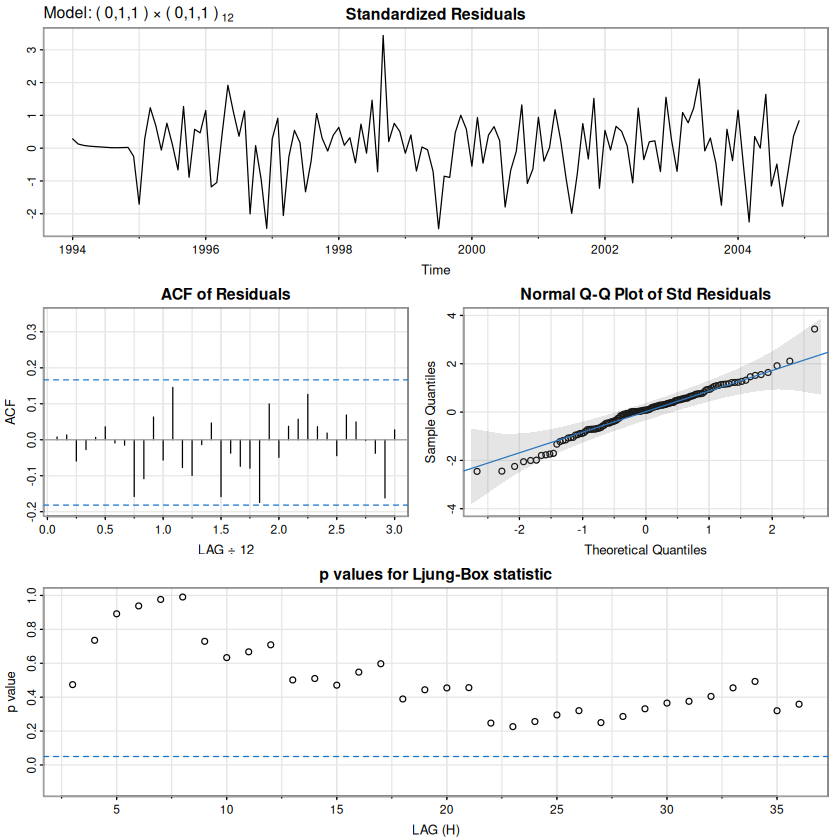

In [20]:
library(astsa);
m1 = sarima(co2,0,1,1,P=0,D=1,Q=1,S=12)
# Gio kiem tra phan du co tinh chuan hay khong voi bieu do QQ
# Kiem tra cac phan du co tuong quan voi nhau khong


In [22]:
# qqnorm(residuals(sarima(co2,0,1,1,P=0,D=1,Q=1,S=12), main="QQ plot for residuals"))
# shapiro.test(window())
# acf(as.vector(window(residuals(m1.co2))), lag.max = 36, main="ACF for residuals")
Box.test(..., type = "Ljung-Box", lag = 12, fitdf = 0)

# Phan du khong tuong quan voi nhau
# Vay day la mo hinh phu hop voi cua chung ta

ERROR: Error in eval(expr, envir, enclos): object 'm1.co2' not found


Bay gio su dung de du bao voi 2 nam tiep theo (24 thang)

Nhu vay la xu ly duoc mo hinh theo mua nay nhu la moi mo hinh khong theo mua khac ma chung ta da biet

In [23]:
plot(m1.co2, n1=c(2003, 1), n.ahead = 24, xlab = "Year", ylab = "CO2 (ppm)", main = "Forecast for CO2", type = "o")

ERROR: Error in eval(expr, envir, enclos): object 'm1.co2' not found


# Mo hinh ARCH

Engle (1982) - model tinh di biet co dieu kien tu hoi quy
Mo hinh hoa su hay doi phuong sai (tinh bien dong) cua 1 chuoi theo thoi gian

Phuong sai thay doi & Phuong sai co dieu kien

# Mo hinh GARCH

Tong quat cua ARCH




In [ ]:
library(tseries)

garch11.sim=garch.sim(alpha = c(0.02, 0.05), )

eacf(binh phuong cua chuoi ban dau/tri tuyet doi cua chuoi ban dau)

AIC(...) # nho hon la phu hop hon

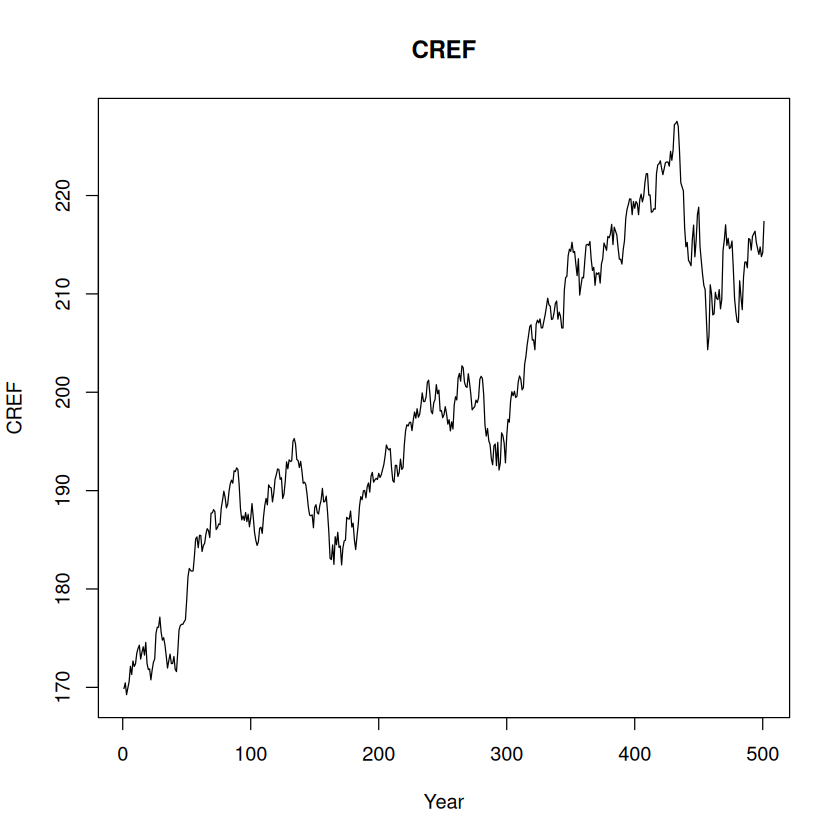

In [25]:
# Vi du voi chuoi thuc te

library(TSA)
data(CREF); plot(x = CREF, ylab = "CREF", xlab = "Year", main = "CREF")

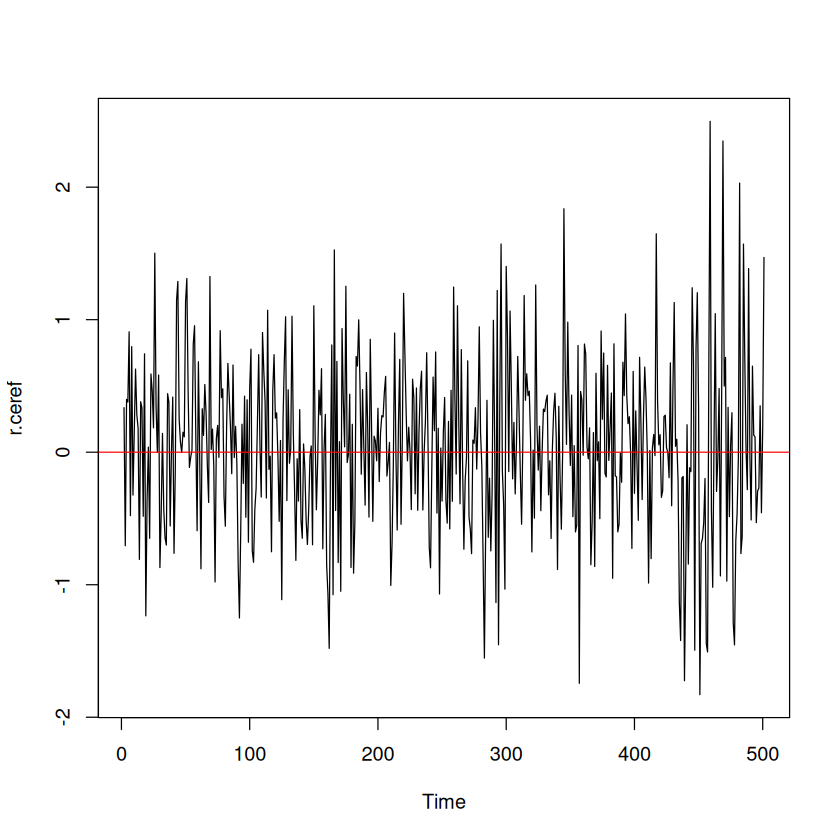

In [26]:
r.ceref = diff(log(CREF)*100); plot(r.ceref); abline(h = 0, col = "red")
# tinh loi nhuan hang ngay cua co phieu
# *100 de the hien % tang truong

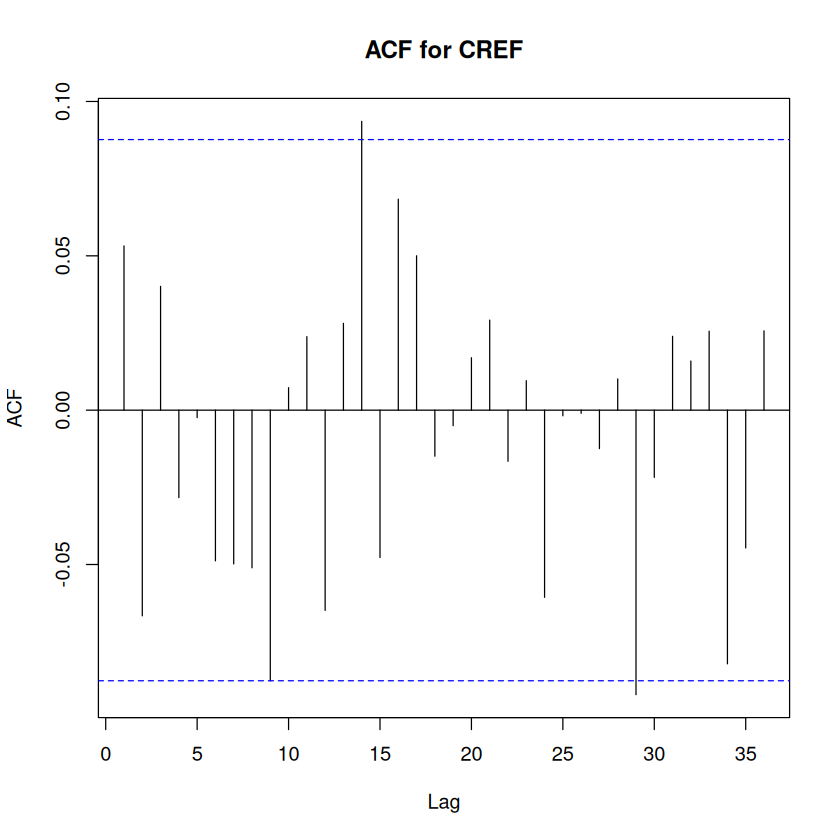

In [27]:
acf(r.ceref, lag.max = 36, main = "ACF for CREF")
# nhin chung loi nhuan khong co tuong quan noi tiep voi nhau
# chi co lag 14, 29 thay co 1 chut co y nghia

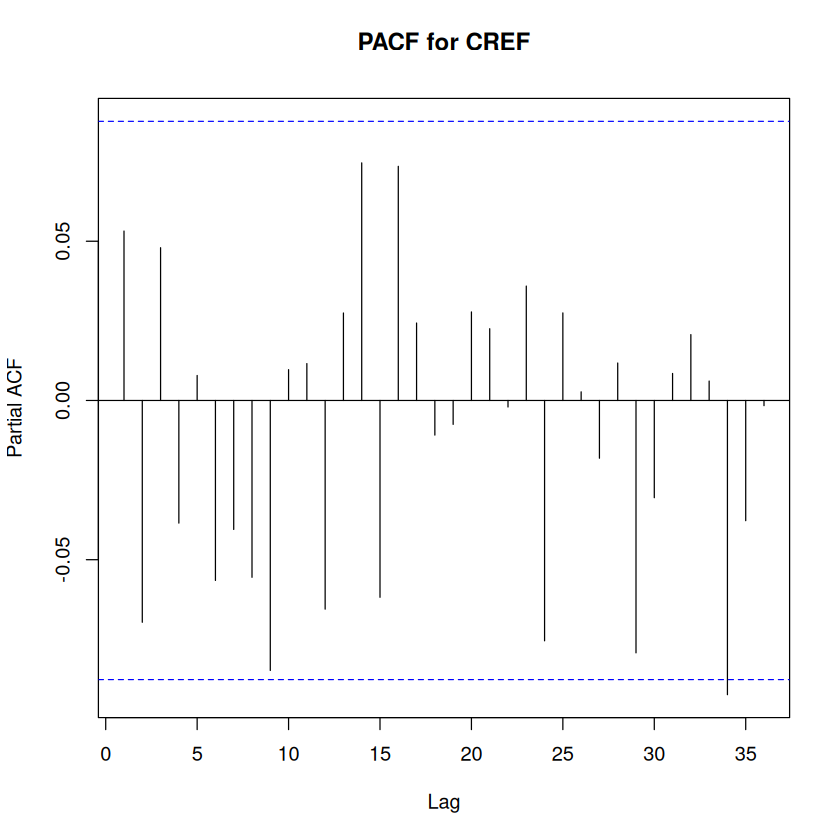

In [28]:
pacf(r.ceref, lag.max = 36, main = "PACF for CREF")

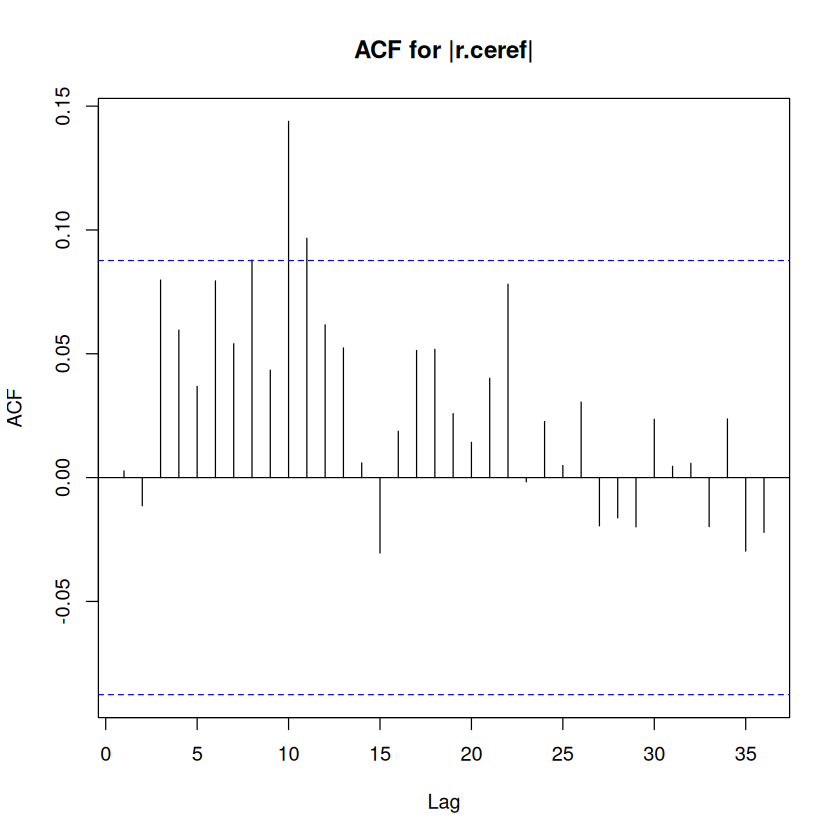

In [29]:
# Gio xem tri tuyet doi, hay binh phuong no co tuong quan hay khong. Neu co thi co the dung sang mo hinh GARCH

acf(abs(r.ceref), lag.max = 36, main = "ACF for |r.ceref|")
# Co 1 so gia tri co y nghia: khi lay tai lag 10

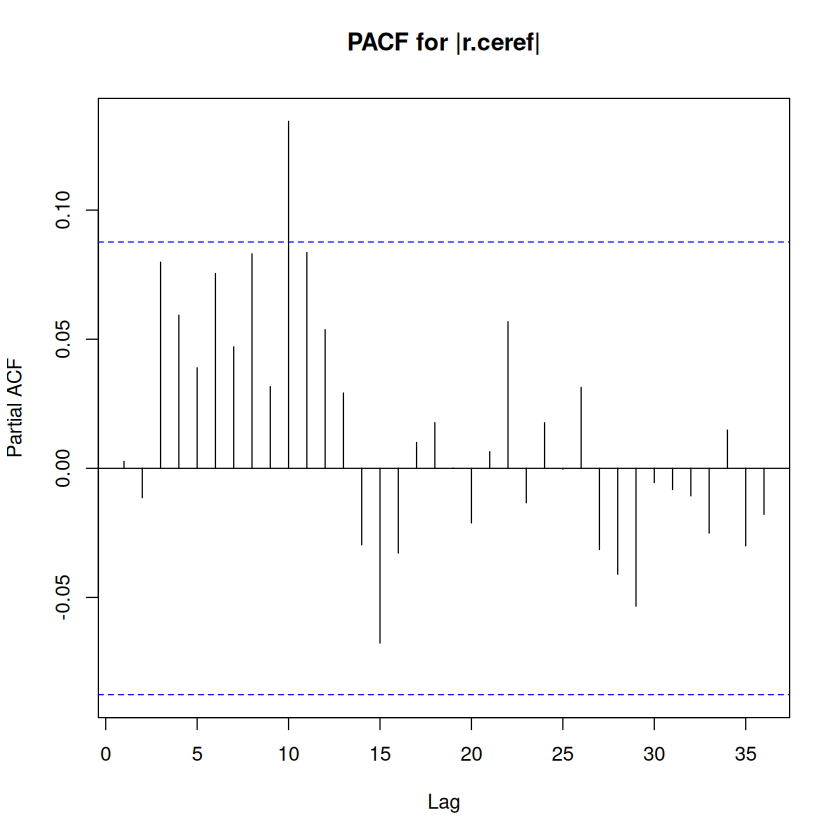

In [30]:
pacf(abs(r.ceref), lag.max = 36, main = "PACF for |r.ceref|")

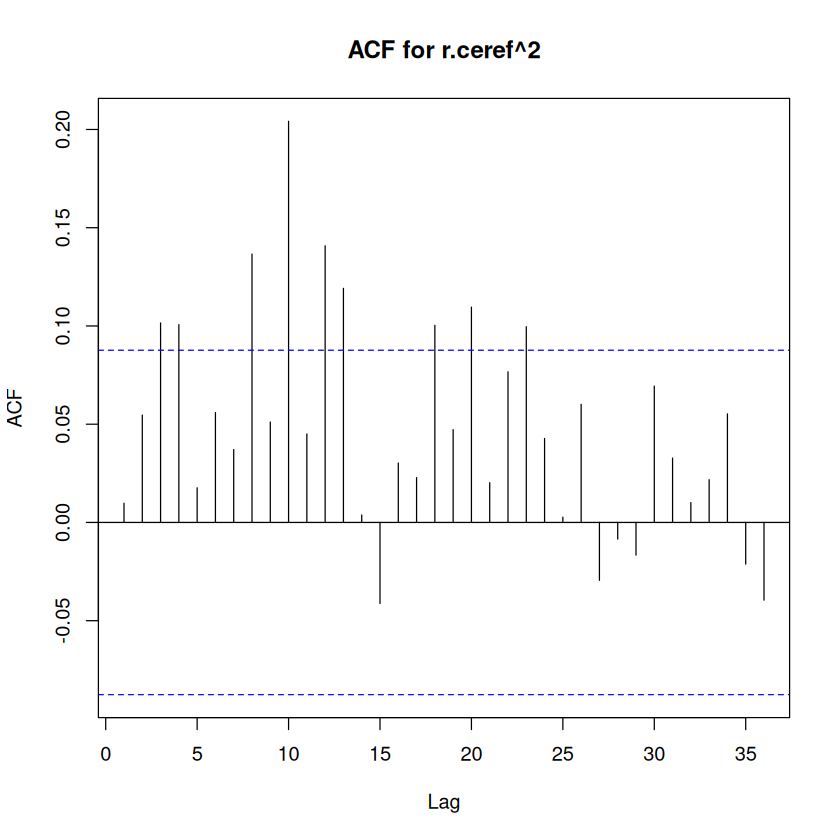

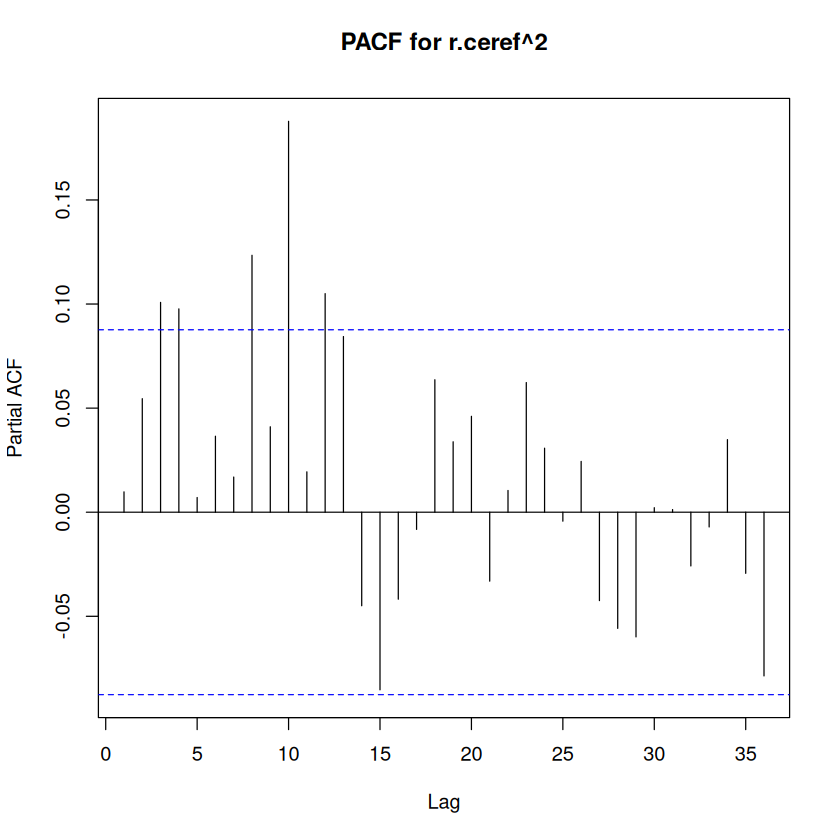

In [31]:
acf(r.ceref^2, lag.max = 36, main = "ACF for r.ceref^2")
pacf(r.ceref^2, lag.max = 36, main = "PACF for r.ceref^2")

In [32]:
# Tu day ta ket luan rang loi nhuan khi lay tuyet doi, lay binh tuong co tu tuong quan dang ke.
# Loi nhuan hang ngay khong theo i.i.d
# Ta co the su dung mo hinh ARCH or GARCH

# Kiem dinh bai toan:
# H0: khong co hieu ung ARCH
# H1: co hieu ung ARCH